In [2]:
import audio_preprocess
import utils

audio_preprocess.filter_audio(td = 'F:\\github\\HP6_collab\\audio\\raw\\hp\\', sf=4000)
#utils.move_to_folder(source='F:\\github\\HP6_collab\\audio\\raw\\hp\\filtered\\', target='F:\\github\\HP6_collab\\audio\\filtered\\')

audio_preprocess.few_second_clips(td= 'F:\\github\\HP6_collab\\audio\\raw\\hp\\filtered\\', clip = 30)
audio_preprocess.few_second_clips(td= 'F:\\github\\HP6_collab\\audio\\raw\\hp\\', clip = 30)
#utils.filename_to_csv(td= 'F:\\github\\HP6_collab\\audio\\filtered\\30s_clip\\')


Filtered audio for F:\github\HP6_collab\audio\raw\hp\
Audio: 240512_0069_f clipped
Audio: 240512_0070_f clipped
Audio: 240514_0093_f clipped
Audio: 240512_0069 clipped
Audio: 240512_0070 clipped
Audio: 240514_0093 clipped


In [2]:
#import utils
#utils.filename_to_csv(td= 'F:\\github\\HP6_collab\\audio\\30s_clip\\')
#utils.move_to_folder(source='F:\\github\\HP6_collab\\audio\\', target='F:\\github\\HP6_collab\\audio\\raw\\')
#utils.move_to_label(source='F:\\github\\HP6_collab\\audio\\raw\\',target='F:\\github\\HP6_collab\\audio\\raw\\',df = 'F:\\github\\HP6_collab\\audio\\file_names.csv')
#utils.combin(td ='F:\\github\\HP6_collab\\audio\\raw\\noaa\\')


In [55]:
import pandas as pd
import librosa
import pandas as pd
import numpy as np
import os
import soundfile as sf
from pydub import AudioSegment

td = 'F:\\github\\HP6_collab\\audio\\raw\\noaa\\'
#name = '240512_0069'
name = 'humpbackwhale_MB01_01'

td= 'F:\\github\\HP6_collab\\audio\\raw\\hp\\30s_clip\\'
name ='240514_0093_600'

clip = 30

# Load audio file
aud, sr = librosa.load(f'{td}{name}.wav')
# Find duration of the audio
dur = int(len(aud)/sr)
print(f'Sampling rate is {sr/1000}kHz')
print(f'Duration is {dur}s')
print(f'No of files of duration {clip}s created will be {dur/30}')

Sampling rate is 22.05kHz
Duration is 30s
No of files of duration 30s created will be 1.0


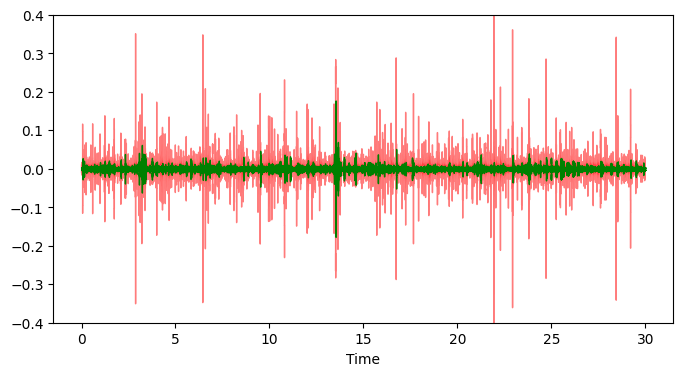

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

aud2,sr2 = librosa.load(f'{td}{name}.wav', sr= 4000)

plt.figure(figsize=(8,4))
librosa.display.waveshow(aud, sr=sr, alpha =0.5, color = 'red')
#plotting the sampled signal
librosa.display.waveshow(aud2, sr=sr2, color = 'green')
plt.ylim(-0.4, 0.4)
plt.show()

In [62]:
import IPython.display as ipd
ipd.Audio(aud, rate=sr)

In [63]:
ipd.Audio(aud2, rate=sr2)

In [64]:
import soundfile as sf
sf.write(f'F:\\aud.wav', aud, sr)
sf.write(f'F:\\aud2.wav', aud2, sr2)

In [7]:
import pandas as pd
import librosa
import pandas as pd
import numpy as np
import os
import soundfile as sf
from scipy.signal import butter, lfilter, freqz

#td = 'F:\\github\\HP6_collab\\audio\\raw\\noaa\\'
#name = 'humpbackwhale_MB01_01'

td= 'F:\\github\\HP6_collab\\audio\\raw\\hp\\30s_clip\\'
name ='240514_0093_600'

In [53]:
# big pre-process function
sr=4000
order=5
cutoff=[50,1000]

# read file with sr=4000hz and mono
aud1, sr = librosa.load(f'{td}{name}.wav', sr= sr, mono=True)
aud = aud1[20000:40000]
# add band pass filter 50 - 1500hz order=5
## Generate butterworth coefficients a,b
a,b = butter(N= order, Wn = cutoff, fs=sr, btype='band', analog=False)
## Apply filter that returns filtered audio y
y = lfilter(a,b, aud)


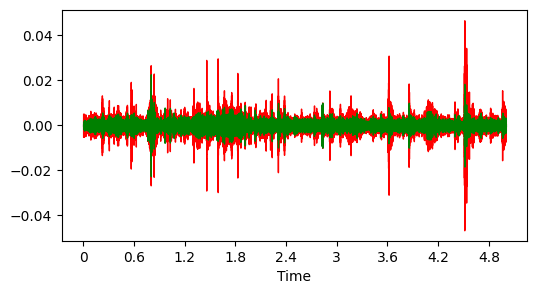

In [54]:
import matplotlib.pyplot as plt
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))

librosa.display.waveshow(aud, sr=sr, alpha =1, color = 'red')
librosa.display.waveshow(y, sr=sr, alpha =1, color='green')

plt.show()

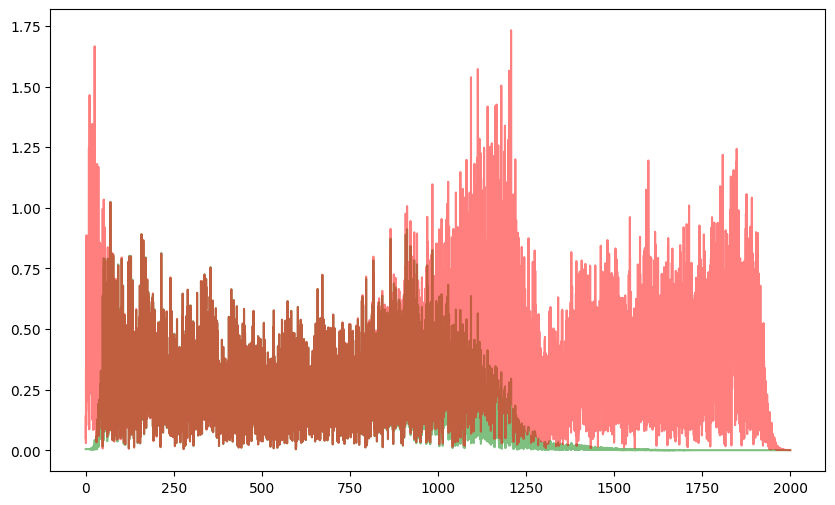

In [45]:
aud_ft = np.fft.fft(aud)
aud_magnitude_spectrum = np.abs(aud_ft)
freq_aud = np.linspace(0,sr, len(aud_magnitude_spectrum))
nf_splice_aud = int(len(freq_aud)/2)

y_ft = np.fft.fft(y)
y_magnitude_spectrum = np.abs(y_ft)
freq_y = np.linspace(0,sr, len(y_magnitude_spectrum))
nf_splice_y = int(len(freq_y)/2)

plt.figure(figsize=(10,6))

plt.plot(freq_y[:nf_splice_y], y_magnitude_spectrum[:nf_splice_y], color = 'green', alpha = 0.5)
plt.plot(freq_aud[:nf_splice_aud], aud_magnitude_spectrum[:nf_splice_aud] , color = 'red', alpha = 0.5)

#plt.ylim((0,50))
#plt.xlim(0,500)
plt.show()

In [46]:
max(y)

0.015194958752995326